In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans

In [80]:
df = pd.read_csv('C:/Users/Ryan Gunawan/Downloads/customer_analysis.csv', sep='\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [81]:
#missing values
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [82]:
df['Income'].fillna(df['Income'].mean(), inplace=True)

In [83]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [84]:
#date_time format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Dt_Customer'] = df['Dt_Customer'].dt.strftime('%d/%m/%Y')
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d/%m/%Y')
df

C:\Users\Ryan Gunawan\AppData\Local\Temp\ipykernel_1512\2042853173.py:2: UserWarning: Parsing '21-08-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
C:\Users\Ryan Gunawan\AppData\Local\Temp\ipykernel_1512\2042853173.py:2: UserWarning: Parsing '19-01-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
C:\Users\Ryan Gunawan\AppData\Local\Temp\ipykernel_1512\2042853173.py:2: UserWarning: Parsing '13-11-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
C:\Users\Ryan Gunawan\AppData\Local\Temp\ipykernel_1512\2042853173.py:2: UserWarning: Parsing '13-03-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df['Dt

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [85]:
#label encoding
le = LabelEncoder()
df['Education'] = le.fit_transform(df['Education'])
df['Marital_Status'] = le.fit_transform(df['Marital_Status'])

df.describe()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,2.393750,3.729911,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,1.124797,1.076277,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,0.000000,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,2.000000,3.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,2.000000,4.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,3.000000,5.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,4.000000,7.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [86]:
#Feature Engineering
#1
current_year = pd.to_datetime('today').year
df['Age'] = current_year - df['Year_Birth']

#2
categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['Spent'] = df[categories].sum(axis=1)

#3
df['Living_With'] = df['Marital_Status'].replace({'Married': 'With Spouse', 'Together': 'With Partner', 'Single': 'Single', 'Divorced': 'Divorced', 'Widow': 'Widow'})

#4
df['Children'] = df['Kidhome'] + df['Teenhome']

#5
df['Family_Size'] = df['Children'] + 2  

#6
df['Is_Parent'] = df['Children'].apply(lambda x: 1 if x > 0 else 0)

#7
df['Education'] = df['Education'].replace({'Basic': 'Basic Education', '2n Cycle': '2nd Cycle Education', 'Graduation': 'Graduation', 'Master': 'Master', 'PhD': 'PhD'})

#8
redundant_features = ['ID', 'Year_Birth', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Marital_Status'] 
df.drop(columns=redundant_features, inplace=True)

df

,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,2,58138.0,0,0,58,635,88,546,172,88,...,0,0,0,1,66,1617,4,0,2,0
1,2,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,0,69,27,4,2,4,1
2,2,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,0,58,776,5,0,2,0
3,2,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,0,39,53,5,1,3,1
4,4,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,0,42,422,3,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,61223.0,0,1,46,709,43,182,42,118,...,0,0,0,0,56,1341,3,1,3,1
2236,4,64014.0,2,1,56,406,0,30,0,0,...,1,0,0,0,77,444,5,3,5,1
2237,2,56981.0,0,0,91,908,48,217,32,12,...,0,0,0,0,42,1241,2,0,2,0
2238,3,69245.0,0,1,8,428,30,214,80,30,...,0,0,0,0,67,843,5,1,3,1


In [87]:
#Feature Scaling
sc = StandardScaler()
dfs = sc.fit_transform(df)

In [96]:
#Dimensionality Reduction
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

n_components = 2 
pca = PCA(n_components=n_components)
pca.fit(dfs)
df_PCA = pd.DataFrame(pca.fit_transform(dfs), columns=(["PCA1", "PCA2"]))
df_PCA

,PCA1,PCA2
0,4.748140,-0.116867
1,-3.197764,0.506278
2,2.513756,-1.111257
3,-2.487804,-1.712207
4,-0.662148,0.194524
...,...,...
2235,2.077063,2.026301
2236,-2.657185,4.304468
2237,2.642327,-0.993892
2238,1.353253,1.653574


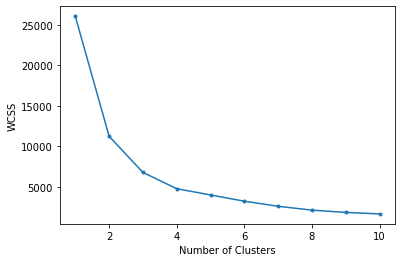

In [97]:
#Elbow Method
ssquares = []
for i in range(1,11) :
  km = KMeans(n_clusters=i, max_iter=500, random_state=42)
  km.fit(df_PCA)
  ssquares.append(km.inertia_)
plt.plot(range(1,11), ssquares, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [98]:
from kneed import KneeLocator

findknee = KneeLocator(range(1,11), ssquares, curve="convex", direction="decreasing")
print("the best k for your model is ",findknee.elbow)

the best k for your model is  3


In [99]:
km_model = KMeans(n_clusters = 3, random_state=1)
y_kmeans = km_model.fit_predict(df_PCA)
y_kmeans

array([0, 1, 0, ..., 0, 2, 1])

In [112]:
#Agglomerative Clustering
n_clusters = 3  
model = AgglomerativeClustering(n_clusters=n_clusters)
cluster_labels = model.fit_predict(df_PCA)
df_PCA['Cluster'] = cluster_labels
df_PCA

,PCA1,PCA2,Cluster_Label,Cluster
0,4.748140,-0.116867,1,1
1,-3.197764,0.506278,0,0
2,2.513756,-1.111257,1,1
3,-2.487804,-1.712207,0,0
4,-0.662148,0.194524,0,0
...,...,...,...,...
2235,2.077063,2.026301,2,2
2236,-2.657185,4.304468,0,0
2237,2.642327,-0.993892,1,1
2238,1.353253,1.653574,2,2


<function matplotlib.pyplot.show(close=None, block=None)>

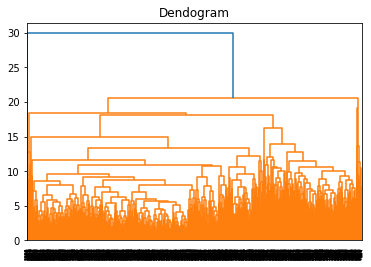

In [113]:
dist_matrix = sch.linkage(dfs, method='complete')
dn = sch.dendrogram(dist_matrix)
plt.title('Dendogram')
plt.show

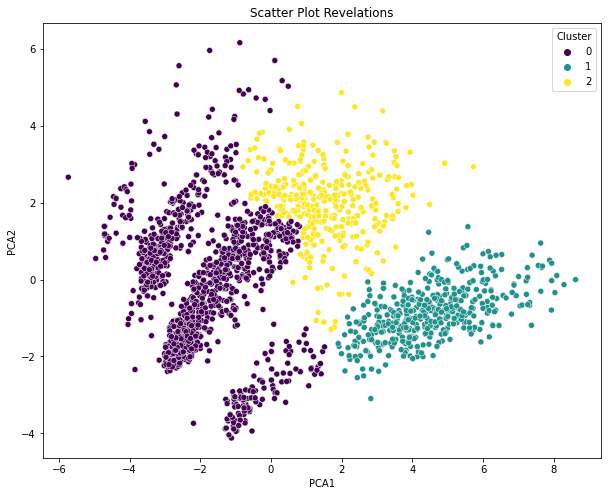

In [114]:
#Scatter Plot Revelations
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.scatterplot(x=df_PCA['PCA1'], y=df_PCA['PCA2'], hue=cluster_labels, palette='viridis')
plt.title('Scatter Plot Revelations')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()

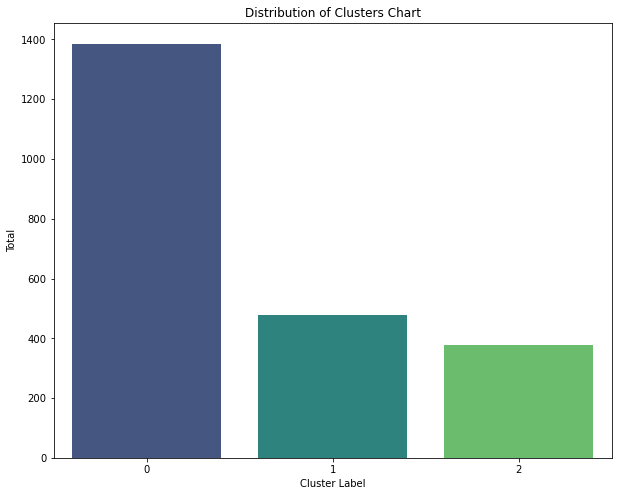

In [117]:
#draw distribution of cluster chart
plt.figure(figsize=(10, 8))
sns.countplot(x='Cluster', data=df_PCA, palette='viridis')
plt.title('Distribution of Clusters Chart')
plt.xlabel('Cluster Label')
plt.ylabel('Total')
plt.show()

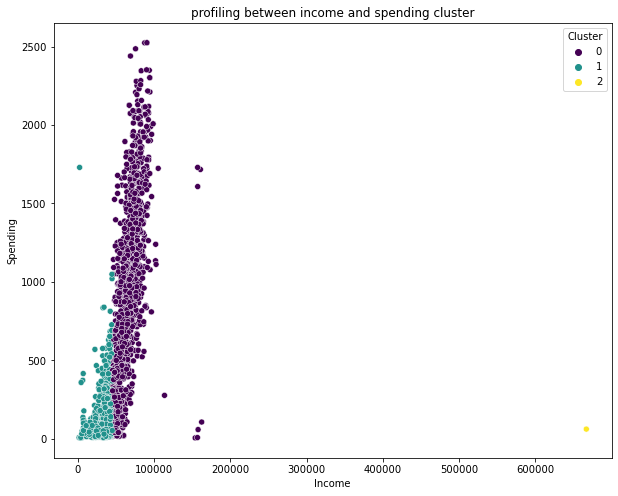

In [128]:
#profiling between income and spending cluster
n_clusters = 3  
model = AgglomerativeClustering(n_clusters=n_clusters)
cluster_labels = model.fit_predict(df)
df['Cluster'] = cluster_labels

plt.figure(figsize=(10, 8))
sns.scatterplot(x='Income', y='Spent', hue='Cluster', data=df, palette='viridis')
plt.title('profiling between income and spending cluster')
plt.xlabel('Income')
plt.ylabel('Spending')
plt.legend(title='Cluster')
plt.show()